# Lounge Access Modelling

This project is focused around the problem of modelling demand for different types of airport lounge space. As British Airways (BA) plans for future operations at Heathrow terminal 3, it's important to forecast how many passengers will be eligible to access each lounge on any given day. Eligibility is determined from a combination of customer loyalty and travel class. 


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('British Airways Summer Schedule Dataset - Forage Data Science Task 1.csv')

In [12]:
df.head()

,FLIGHT_DATE,FLIGHT_TIME,TIME_OF_DAY,AIRLINE_CD,FLIGHT_NO,DEPARTURE_STATION_CD,ARRIVAL_STATION_CD,ARRIVAL_COUNTRY,ARRIVAL_REGION,HAUL,AIRCRAFT_TYPE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX
0,02/09/2025,14:19,Afternoon,BA,BA5211,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,10,38
1,10/06/2025,06:42,Morning,BA,BA7282,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,7,28
2,27/10/2025,15:33,Afternoon,BA,BA1896,LHR,FRA,Germany,Europe,SHORT,A320,0,17,163,0,11,40
3,15/06/2025,18:29,Evening,BA,BA5497,LHR,IST,Turkey,Europe,SHORT,A320,0,8,172,0,16,54
4,25/08/2025,20:35,Evening,BA,BA1493,LHR,FRA,Germany,Europe,SHORT,A320,0,13,167,0,6,27


In [ ]:
morning_flights = df[df['TIME_OF_DAY'] == 'Morning']
afternoon_flights = df[df['TIME_OF_DAY'] == 'Afternoon']
evening_flights = df[df['TIME_OF_DAY'] == 'Evening']

morning_t1_count = morning_flights['TIER1_ELIGIBLE_PAX'].sum()
morning_t2_count = morning_flights['TIER2_ELIGIBLE_PAX'].sum()
morning_t3_count = morning_flights['TIER3_ELIGIBLE_PAX'].sum()

morning_total_count = morning_t1_count + morning_t2_count + morning_t3_count

morning_estimates = [morning_t1_count/(morning_total_count), morning_t2_count/(morning_total_count), morning_t3_count/(morning_total_count)]
morning_estimates

[np.float64(0.015524101493705564),
 np.float64(0.20384986121076396),
 np.float64(0.7806260372955305)]

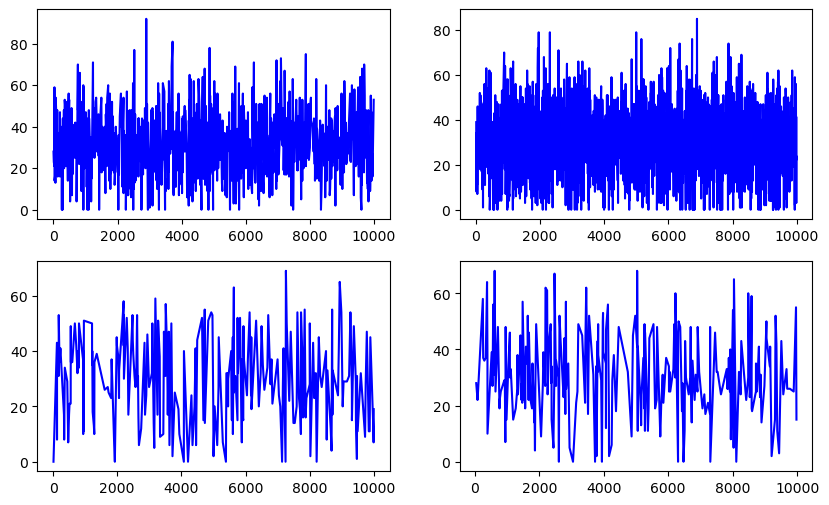

In [80]:
morning_NA_flights = morning_flights[morning_flights['ARRIVAL_REGION'] == 'North America']
morning_EU_flights = morning_flights[morning_flights['ARRIVAL_REGION'] == 'Europe']
morning_AS_flights = morning_flights[morning_flights['ARRIVAL_REGION'] == 'Asia']
morning_ME_flights = morning_flights[morning_flights['ARRIVAL_REGION'] == 'Middle East']

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax[0, 0].plot(morning_NA_flights.index, morning_NA_flights['TIER3_ELIGIBLE_PAX'], label='TIER 1', color='blue')
ax[0, 1].plot(morning_EU_flights.index, morning_EU_flights['TIER3_ELIGIBLE_PAX'], label='TIER 1', color='blue')
ax[1, 0].plot(morning_AS_flights.index, morning_AS_flights['TIER3_ELIGIBLE_PAX'], label='TIER 1', color='blue')
ax[1, 1].plot(morning_ME_flights.index, morning_ME_flights['TIER3_ELIGIBLE_PAX'], label='TIER 1', color='blue')

In [81]:
morning_flights['ARRIVAL_REGION'].unique()

array(['North America', 'Europe', 'Asia', 'Middle East'], dtype=object)

(array([2.215e+03, 0.000e+00, 8.070e+02, 0.000e+00, 3.140e+02, 0.000e+00,
        1.200e+02, 0.000e+00, 4.000e+01, 0.000e+00, 0.000e+00, 2.600e+01,
        0.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <BarContainer object of 20 artists>)

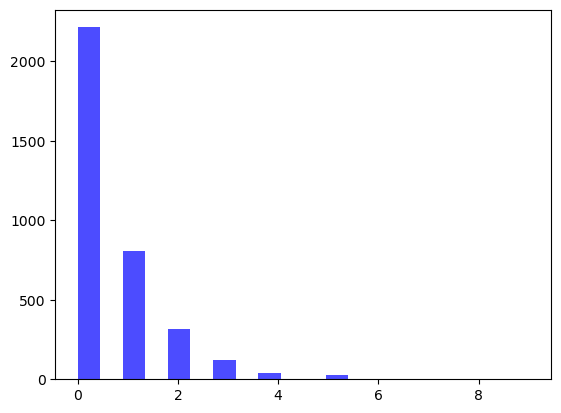

In [88]:
std = df['TIER3_ELIGIBLE_PAX'].describe()['std']

plt.hist(morning_flights['TIER1_ELIGIBLE_PAX'], bins=20, color='blue', alpha=0.7)